# *Projeto 1 - Relatório de fechamento de mercado por e-mail.*

**Desafio:
Construir um e-mail que chegue na caixa de entrada todos os dias com informações de fechamento do Ibovespa e dólar.**

*Passo a passo:*

Passo 1 - Importar os módulos e bibliotecas.

Passo 2 - Pegar dados do Ibovespa e do Dólar no Yahoo Finance.

Passo 3 - Manipular os dados para deixá-los nos formatos necessários para fazer as contas.

Passo 4 - Calcular o retorno diário, mensal e anual.

Passo 5 - Localizar, dentro das tabelas de retornos, os valores de fechamento de mercado que irão pro texto anexado no e-mail.

Passo 6 - Fazer os gráficos dos ativos.

Passo 7 - Enviar o e-mail

In [ ]:
import pandas as pd

In [ ]:
!pip install python-dotenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mplcyberpunk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install yfinance==0.1.74

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.14
    Uninstalling yfinance-0.2.14:
      Successfully uninstalled yfinance-0.2.14


# ***Passo 1 - Importando os módulos necessários***



In [7]:
import pandas as pd #Principal para analise de dados
import datetime # Lida com datas
import yfinance as yf # baixar as cotações
from matplotlib import pyplot as plt #Realiza os graficos
import mplcyberpunk # estilização de grafico
import smtplib #Conseguir enviar o email
from email.message import EmailMessage #Conseguir enviar o email


# ***Passo 2 - Pegar dados do Yahoo Finance***

In [10]:
ativos = ['^BVSP', 'BRL=X'] # Código das cotações

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)

dados_mercado = yf.download(ativos, um_ano_atras, hoje)

display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                     High  \
               BRL=X          ^BVSP   BRL=X          ^BVSP     BRL=X   
Date                                                                   
2022-04-04    4.6572  121280.000000  4.6572  121280.000000  4.670100   
2022-04-05    4.5938  118885.000000  4.5938  118885.000000  4.669100   
2022-04-06    4.6507  118228.000000  4.6507  118228.000000  4.712600   
2022-04-07    4.7152  118862.000000  4.7152  118862.000000  4.769900   
2022-04-08    4.7521  118322.000000  4.7521  118322.000000  4.791300   
...              ...            ...     ...            ...       ...   
2023-03-28    5.1971  101185.000000  5.1971  101185.000000  5.197700   
2023-03-29    5.1644  101793.000000  5.1644  101793.000000  5.182300   
2023-03-30    5.1342  103713.000000  5.1342  103713.000000  5.155928   
2023-03-31    5.0927  101882.000000  5.0927  101882.000000  5.103300   
2023-04-03    5.0623  101506.179688  5.0623  101506.179688  5.075500   

                                Low                   Open                 \
                    ^BVSP     BRL=X          ^BVSP   BRL=X          ^BVSP   
Date                                                                        
2022-04-04  121570.000000  4.604057  120754.000000  4.6572  121569.000000   
2022-04-05  121628.000000  4.575500  118794.000000  4.5938  121279.000000   
2022-04-06  118885.000000  4.647900  116791.000000  4.6507  118885.000000   
2022-04-07  119247.000000  4.690400  117509.000000  4.7152  118226.000000   
2022-04-08  118868.000000  4.707518  117487.000000  4.7521  118861.000000   
...                   ...       ...            ...     ...            ...   
2023-03-28  101559.000000  5.147900   99488.000000  5.1971   99672.000000   
2023-03-29  102213.000000  5.131730  100248.000000  5.1644  101185.000000   
2023-03-30  104085.000000  5.077300  101796.000000  5.1342  101796.000000   
2023-03-31  104041.000000  5.055200  101476.000000  5.0927  103714.000000   
2023-04-03  101915.710938  5.036216  100650.546875  5.0623  101883.210938   

           Volume              
            BRL=X       ^BVSP  
Date                           
2022-04-04      0   8812500.0  
2022-04-05      0  11788300.0  
2022-04-06      0  13410800.0  
2022-04-07      0  11520100.0  
2022-04-08      0  11225800.0  
...           ...         ...  
2023-03-28      0  13500100.0  
2023-03-29      0  12456100.0  
2023-03-30      0  14901600.0  
2023-03-31      0  15111200.0  
2023-04-03      0         0.0  

[261 rows x 12 columns]

# ***Passo 3.1 - Manipulando os Dados***

In [13]:
dados_mercado['Adj Close']['^BVSP']

Date
2022-04-04    121280.000000
2022-04-05    118885.000000
2022-04-06    118228.000000
2022-04-07    118862.000000
2022-04-08    118322.000000
                  ...      
2023-03-28    101185.000000
2023-03-29    101793.000000
2023-03-30    103713.000000
2023-03-31    101882.000000
2023-04-03    101506.179688
Freq: B, Name: ^BVSP, Length: 261, dtype: float64

In [15]:
dados_fechamento = dados_mercado ['Adj Close']
dados_fechamento.columns = ['dolar', 'ibovespa']

dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,dolar,ibovespa
Date,,
2022-04-04,4.6572,121280.000000
2022-04-05,4.5938,118885.000000
2022-04-06,4.6507,118228.000000
2022-04-07,4.7152,118862.000000
2022-04-08,4.7521,118322.000000
...,...,...
2023-03-28,5.1971,101185.000000
2023-03-29,5.1644,101793.000000
2023-03-30,5.1342,103713.000000


# ***Passo 3.2 - Manipulando os dados***

In [18]:
dados_fechamento_mensal = dados_fechamento.resample('M').last()
#Na linha acima é transformado em uma tabela a última cotação de cada mes
#Utilizando funções

dados_fechamento_anual = dados_fechamento.resample('Y').last()
#Na linha acima é transformado em uma tabela a última cotação de cada ano




dados_fechamento_anual




,dolar,ibovespa
Date,,
2022-12-31,5.2668,110031.000000
2023-12-31,5.0623,101506.179688


# ***Passo 4 - Calcular fechamento do dia, do mês e ano***

In [21]:
retorno_no_ano = dados_fechamento_anual.pct_change().dropna()

retorno_no_mes = dados_fechamento_mensal.pct_change().dropna()

retorno_no_dia = dados_fechamento.pct_change().dropna()

retorno_no_dia

retorno_no_ano

retorno_no_mes

,dolar,ibovespa
Date,,
2022-05-31,-0.037547,0.032213
2022-06-30,0.090165,-0.115033
2022-07-31,0.000347,0.046914
2022-08-31,-0.011731,0.061629
2022-09-30,0.053554,0.004693
2022-10-31,-0.019959,0.054527
2022-11-30,-0.003839,-0.030602
2022-12-31,-0.000266,-0.021825
2023-01-31,-0.028841,0.031818


# ***Passo 5 - Localizar o fechamento do dia anterior, retorno no mês e retorno no ano.***


Loc -> Referenciar elementos a partir do nome

Iloc -> Selecionar elementos como uma matriz

In [63]:
retorno_no_dia.loc['2023-03-09', 'dolar']

retorno_no_dia.loc['2023-03-09']

dolar      -0.008786
ibovespa   -0.013788
Name: 2023-03-09 00:00:00, dtype: float64

In [64]:
retorno_no_dia.iloc[0, 0] #Devolve primeira linha e primeira coluna

-0.013613285585453494

In [69]:
retorno_dia_dolar = retorno_no_dia.iloc[-1, 0]
retorno_dia_ibovespa = retorno_no_dia.iloc[-1, 1]

retorno_mes_dolar = retorno_no_mes.iloc[-1, 0]
retorno_mes_ibovespa = retorno_no_mes.iloc[-1, 1]

retorno_ano_dolar = retorno_no_ano.iloc[-1, 0]
retorno_ano_ibovespa = retorno_no_ano.iloc[-1, 1]

retorno_ano_dolar

-0.038828078600089855

In [70]:
#Realização do tratamento dos dados

retorno_dia_dolar = round(retorno_dia_dolar * 100, 2)
retorno_dia_ibovespa = round(retorno_dia_ibovespa / 100, 2)

retorno_mes_dolar = round(retorno_mes_dolar * 100, 2)
retorno_mes_ibovespa = round(retorno_mes_ibovespa * 100, 2)

retorno_ano_dolar = round(retorno_ano_dolar * 100, 2)
retorno_ano_ibovespa = round(retorno_ano_ibovespa * 100, 2)

retorno_ano_ibovespa

-7.75

Passo 6

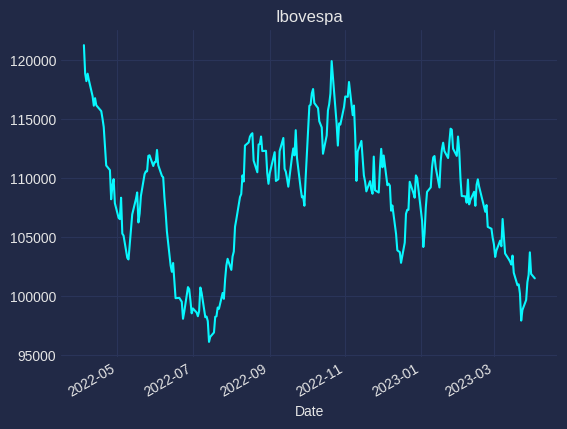

In [33]:
plt.style.use('cyberpunk')

dados_fechamento.plot(y = 'ibovespa', use_index = True, legend = False)

plt.title('Ibovespa') #Título do gráfico

plt.savefig('ibovespa.png', dpi = 300) #Salvando o gráfico

plt.show()

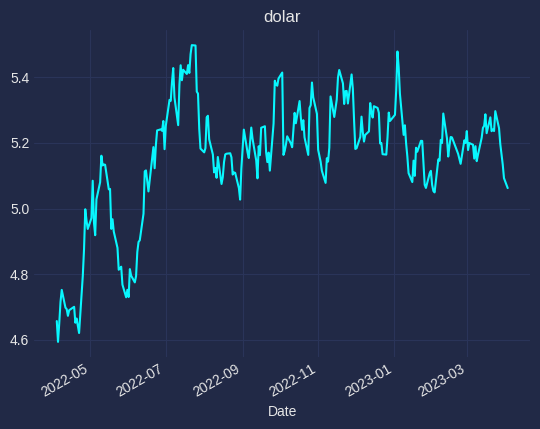

In [34]:
plt.style.use('cyberpunk')

dados_fechamento.plot(y = 'dolar', use_index = True, legend = False)

plt.title('dolar')

plt.savefig('dolar.png', dpi = 300)

plt.show()

# ***Passo 7 - Enviando o E-mail***

Utilizar isso: https://myaccount.google.com/apppasswords

In [36]:
import os #importar essa biblioteca para conseguir logar
from dotenv import load_dotenv

In [92]:
load_dotenv() # Aqui posiciona se a senha foi salva

True

In [39]:
senha = os.environ.get('senha_email')
email = 'seu@email.com.br'



In [88]:
msg = EmailMessage()

msg['subject'] = 'Enviando e-mail com o python'
msg['from'] = 'seu@email.com.br'
msg['to'] = 'email@dapessoa.com.br'

msg.set_content(f'''Prezado Cliente, segue o relatório diário do mercado:

Bolsa:

No ano o Ibovespa está tendo uma rentabilidade de {retorno_ano_ibovespa}%, 
enquanto no mês a rentabilidade é de {retorno_mes_ibovespa}%.

No último dia útil, o fechamento do Ibovespa foi de {retorno_dia_ibovespa}%.

Dólar:

No ano o Dólar está tendo uma rentabilidade de {retorno_ano_dolar}%, 
enquanto no mês a rentabilidade é de {retorno_mes_dolar}%.

No último dia útil, o fechamento do Dólar foi de {retorno_dia_dolar}%.


Abs,

Fernando

''')

In [89]:
with open('dolar.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='dolar.png')
    
    

In [90]:
with open('ibovespa.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='ibovespa.png')

In [91]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    
    smtp.login(email, senha)
    smtp.send_message(msg)